<a href="https://colab.research.google.com/github/colin-lag/Airbnb-Big-Data/blob/master/Airbnb_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the data

In [ ]:
# Download data - please only run this once
import urllib.request
import zipfile
import os

print("Starting download ...")
url = "https://github.com/aihack20/airbnb_challenge/releases/download/data/data-airbnb.zip"
with urllib.request.urlopen(url) as src:
    with open("tmp_airbnb_data.zip", "wb") as dest:
        dest.write(src.read())
print("Unpacking archive ...")
os.makedirs("airbnb_data", exist_ok=True)
with zipfile.ZipFile("tmp_airbnb_data.zip", compression=zipfile.ZIP_DEFLATED) as zip_f:
    zip_f.extractall("airbnb_data")
print("Done!")

Starting download ...
Unpacking archive ...
Done!


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Load the data (will take a short while)

listings = pd.read_csv("airbnb_data/listings.csv")
real_estate = pd.read_csv("airbnb_data/real_estate.csv")
venues = pd.read_csv("airbnb_data/venues.csv")

In [ ]:
# remove warnings

import warnings
warnings.filterwarnings('ignore')

## Restrict listings to ones in NYC

In [ ]:
# restricting the problem to NYC allows us to better focuse the price range on a given area

In [ ]:
listings_NYC = listings[listings['metropolitan'] == 'NYC']

In [ ]:
len(listings_NYC)

40740

## Plotting prices on a map of NYC

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt

norm = mpl.colors.Normalize(vmin=-1.,vmax=1.)

No handles with labels found to put in legend.


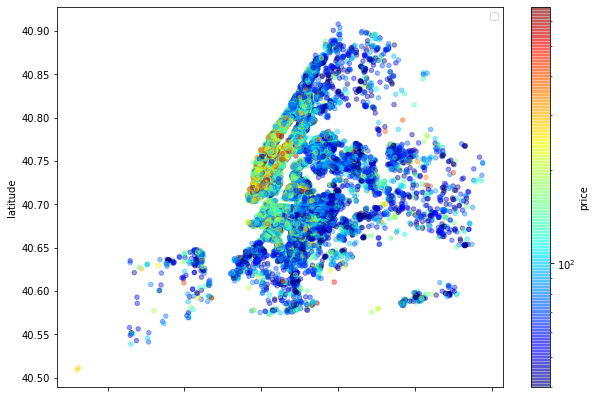

In [ ]:
listings_NYC.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                 figsize=(10,7), c='price', cmap=plt.get_cmap('jet'), colorbar=True,
                 norm=colors.LogNorm(vmin=listings_NYC['price'].min()*4, vmax=listings_NYC['price'].max()/15)
                 )

plt.legend()
plt.show()

## Normalize and gather ranking variables

In [ ]:
#normalize this score which is at 100 to get better average values

listings_NYC['review_scores_rating'] = listings_NYC['review_scores_rating']/10

In [ ]:
#gather the differnt rating columns in a list of columns

ratings = listings_NYC.iloc[:,19:25]

In [ ]:
list(ratings.columns)

['review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value']

In [ ]:
#remove rows where ratings are null

ratings_non_Na = ratings.dropna()

In [ ]:
ratings_non_Na

,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
0,10.0,10.0,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0,9.3,10.0
4,10.0,10.0,10.0,10.0,9.7,10.0
5,10.0,10.0,10.0,10.0,9.7,10.0
6,10.0,10.0,10.0,10.0,9.8,10.0
...,...,...,...,...,...,...
40727,10.0,9.0,10.0,9.0,9.8,10.0
40730,10.0,9.0,10.0,10.0,9.6,9.0
40731,10.0,10.0,10.0,10.0,9.6,10.0
40732,10.0,10.0,10.0,10.0,9.7,10.0


In [ ]:
# normalize the data of the six rating columns into one

rating_avg = ratings_non_Na.sum(axis=1)/6
rating_avg

0        10.000000
3         9.883333
4         9.950000
5         9.950000
6         9.966667
           ...    
40727     9.633333
40730     9.600000
40731     9.933333
40732     9.950000
40736    10.000000
Length: 30674, dtype: float64

In [ ]:
#we add the normalized data column in the Data frame, remove the other ratings column and
# update the dataframes for non-Na rows for ratings

listings_NYC['Normalized rating']=pd.Series(rating_avg)
listings_NYC= listings_NYC.drop(list(ratings),axis=1)
listings_NYC = listings_NYC[listings_NYC['Normalized rating'].notna()]
len(listings_NYC)

30674

## Checking for correlations

In [ ]:
corr_matrix = listings_NYC.corr()
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
weekly_price         0.581100
accommodates         0.386051
beds                 0.310775
bedrooms             0.306049
bathrooms            0.262186
availability_30      0.059499
Normalized rating    0.035234
latitude             0.033099
host_id             -0.024197
id                  -0.045292
longitude           -0.171891
has_availability          NaN
Name: price, dtype: float64

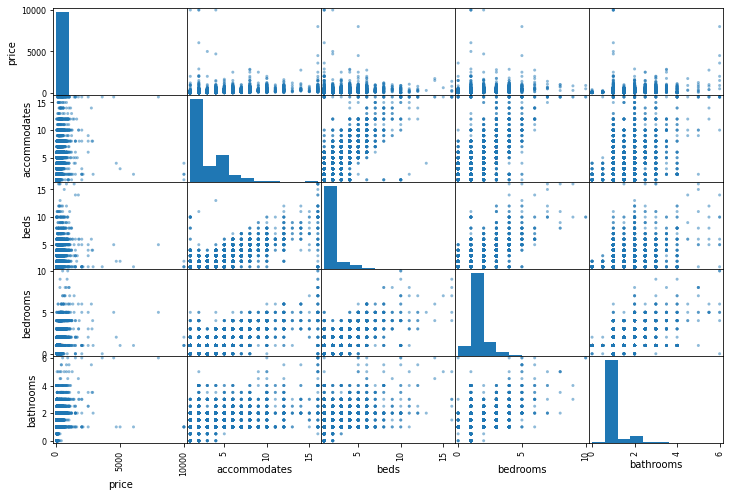

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['price','accommodates', 'beds', 'bedrooms', 'bathrooms' ]
scatter_matrix(listings_NYC[attributes], figsize=(12,8))
plt.show()

## Getting rid of Null values and dropping columns

In [ ]:
count = listings_NYC.isna().sum()
count

accommodates               0
amenities                  0
availability_30            0
bathrooms                129
bed_type                   0
bedrooms                  57
beds                      38
cancellation_policy        0
city                      28
has_availability       30674
host_id                    0
id                         0
instant_bookable           0
latitude                   0
longitude                  0
metropolitan               0
name                      12
price                      0
property_type              0
room_type                  0
state                      0
weekly_price           23030
zipcode                  392
Normalized rating          0
dtype: int64

In [ ]:
# according to this, there is no point in keeping the 'has availability column' as well as the 
# 'weekly_price' one as we already have a 'price' variable as well
# we also drop rows for which values for 'bedroom', 'beds' or 'bathrooms' is Na

listings_NYC = listings_NYC.drop(['has_availability','weekly_price'],axis=1)

In [ ]:
listings_NYC.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'host_id', 'id',
       'instant_bookable', 'latitude', 'longitude', 'metropolitan', 'name',
       'price', 'property_type', 'room_type', 'state', 'zipcode',
       'Normalized rating'],
      dtype='object')

In [ ]:
count_2 = listings_NYC.isna().sum()
count_2

accommodates             0
amenities                0
availability_30          0
bathrooms              129
bed_type                 0
bedrooms                57
beds                    38
cancellation_policy      0
city                    28
host_id                  0
id                       0
instant_bookable         0
latitude                 0
longitude                0
metropolitan             0
name                    12
price                    0
property_type            0
room_type                0
state                    0
zipcode                392
Normalized rating        0
dtype: int64

In [ ]:
listings_NYC = listings_NYC.dropna(subset=['beds','bathrooms','bedrooms'])

In [ ]:
listings_NYC = listings_NYC.dropna(subset=['zipcode'])
listings_NYC = listings_NYC.drop(['name', 'amenities','city'],axis=1)

In [ ]:
listings_NYC = listings_NYC.drop(['host_id','availability_30'],axis=1)

In [ ]:
count_3 = listings_NYC.isna().sum()
count_3

accommodates           0
bathrooms              0
bed_type               0
bedrooms               0
beds                   0
cancellation_policy    0
id                     0
instant_bookable       0
latitude               0
longitude              0
metropolitan           0
price                  0
property_type          0
room_type              0
state                  0
zipcode                0
Normalized rating      0
dtype: int64

In [ ]:
len(listings_NYC)

30089

## Removal of Outliers 

In [ ]:
# Calculating the z score of every price data point, if the z score of the point
# is more than 3, then it is quite far off from the mean and the rest of the data
# will be removed from the dataset

from scipy import stats

z_scores = stats.zscore(listings_NYC['price'])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
listings_NYC = listings_NYC[filtered_entries]

In [ ]:
len(filtered_entries)

30089

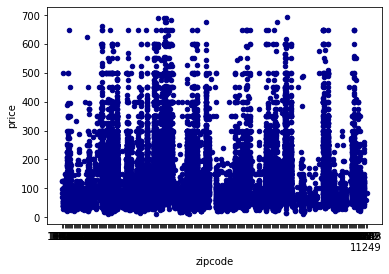

In [ ]:
ax1 = listings_NYC.plot.scatter(x='zipcode',y='price',c='DarkBlue')

## Zipcode preprocessing

In [ ]:
# Removing all the rows with non standard zipcode (dash, alphanumeric)
# or errors in formatting, and transform the zipcodes into a numerical 
# value that can be used to plot or used more easily

In [ ]:
listings_NYC = listings_NYC[listings_NYC.zipcode != '11103-3233']

In [ ]:
listings_NYC = listings_NYC[listings_NYC.zipcode != '10003-8623']

In [ ]:
listings_NYC = listings_NYC[listings_NYC.zipcode != '11385-2308']

In [ ]:
listings_NYC = listings_NYC[listings_NYC.zipcode != '1m']

In [ ]:
listings_NYC.loc[(listings_NYC.zipcode == '11249\n11249'),'zipcode']='11249'

In [ ]:
listings_NYC['zipcode'] = listings_NYC['zipcode'].apply(pd.to_numeric)

In [ ]:
# creating a list of the most recent real estate values for all of the zipcodes 
# in the listing dataframe

In [ ]:
list_zip = list(listings_NYC['zipcode'])

In [ ]:
final_zip_list = list(set(list_zip))

In [ ]:
real_estate_NYC = real_estate[real_estate['city']=='New York']

In [ ]:
zip_real_estate = real_estate_NYC[['type','zipcode','2017-06']].copy()

In [ ]:
zip_real_estate['zipcode'] = zip_real_estate['zipcode'].apply(pd.to_numeric, errors = 'coerce')

In [ ]:
zip_real_estate = zip_real_estate[zip_real_estate['type'] != 'ZHVI']

In [ ]:
zip_real_estate

,type,zipcode,2017-06
13200,ZRI,10025,3669
13202,ZRI,10023,3983
13205,ZRI,10002,3609
13207,ZRI,10467,1728
13211,ZRI,11226,2324
...,...,...,...
23669,ZRI,11363,2739
23952,ZRI,10006,3289
24257,ZRI,10004,4770
24892,ZRI,10464,1946


## Adding local real estate value to listings

In [ ]:
# Adding a real estate pricing for each listing depending on their 
# respective zipcode and dropping the listings with no real estate value

In [ ]:
estate_zip = list(zip_real_estate['zipcode'])
final_estate_zip = list(set(estate_zip))
len(final_estate_zip)

160

In [ ]:
def findEstateVal(zip):
    if zip in final_estate_zip:
        val = zip_real_estate.loc[zip_real_estate['zipcode'] == zip]['2017-06'].item()
    else:
        val = np.nan
    return val

In [ ]:
listings_NYC['realestate'] = listings_NYC['zipcode'].apply(lambda x: findEstateVal(x))

In [ ]:
listings_NYC = listings_NYC.dropna(axis='rows')

## Venues Preprocessing

In [ ]:
# Identifying every listed value in NYC with a rating and dropping
# every other unnecessary collumns

In [ ]:
venues_NYC = venues[venues['city']=='new york city']

In [ ]:
venues_NYC = venues_NYC.drop(['city','id','name','types'],axis=1)

In [ ]:
venues_NYC = venues_NYC.dropna()

In [ ]:
venues_NYC = venues_NYC.reset_index(drop=True)

##Adding venues rating 


In [ ]:
#Adding the number of venues and average rating of the venus in a 1.1km radius 
#around the airbnb

In [ ]:
def neighbourhood_num(lat, long):
  distance = 0.01
  venues_near = venues_NYC[((venues_NYC['latitude'] >= lat-distance)&(venues_NYC['latitude'] <=lat+distance))&((venues_NYC['longitude'] >=long-distance)&(venues_NYC['longitude']<=long+distance))]
  num_venues = len(venues_near)
  return num_venues

In [ ]:
def neighbourhood_rating(lat, long):
  distance = 0.01
  venues_near = venues_NYC[((venues_NYC['latitude'] >= lat-distance)&(venues_NYC['latitude'] <=lat+distance))&((venues_NYC['longitude'] >=long-distance)&(venues_NYC['longitude']<=long+distance))]
  venues_rating = venues_near['rating'].mean()
  return venues_rating

In [ ]:
listings_NYC['num_venues'] = listings_NYC.apply(lambda x: neighbourhood_num(x['latitude'], x['longitude']), axis=1)
listings_NYC['venues_rating'] = listings_NYC.apply(lambda x: neighbourhood_rating(x['latitude'], x['longitude']), axis=1)

In [ ]:
listings_NYC = listings_NYC.dropna()

## Feature Engineering


In [ ]:
## Instead of having two features for number of bedrooms and bathrooms, we regroup this into a rooms feature

In [ ]:
features_df = listings_NYC.copy(deep=True)

In [ ]:
features_df.dtypes

accommodates           float64
bathrooms              float64
bed_type                object
bedrooms               float64
beds                   float64
cancellation_policy     object
id                       int64
instant_bookable        object
latitude               float64
longitude              float64
metropolitan            object
price                  float64
property_type           object
room_type               object
state                   object
zipcode                float64
Normalized rating      float64
realestate             float64
num_venues               int64
venues_rating          float64
dtype: object

In [ ]:
features_df['rooms'] = features_df['bedrooms'] + features_df['bathrooms']

In [ ]:
features_df.drop(['bedrooms','bathrooms'],axis=1)

,accommodates,bed_type,beds,cancellation_policy,id,instant_bookable,latitude,longitude,metropolitan,price,property_type,room_type,state,zipcode,Normalized rating,realestate,num_venues,venues_rating,rooms
0,2.0,Real Bed,1.0,moderate,7949480,f,40.852054,-73.788680,NYC,99.0,House,Private room,NY,10464.0,10.000000,1946.0,51,4.345098,2.0
3,3.0,Real Bed,1.0,strict,6627449,f,40.849775,-73.786609,NYC,125.0,Apartment,Entire home/apt,NY,10464.0,9.883333,1946.0,54,4.325926,2.0
4,4.0,Real Bed,1.0,moderate,5557381,t,40.850024,-73.789328,NYC,69.0,House,Private room,NY,10464.0,9.950000,1946.0,54,4.325926,2.0
5,2.0,Real Bed,1.0,moderate,9147025,f,40.844870,-73.789541,NYC,125.0,House,Entire home/apt,NY,10464.0,9.950000,1946.0,60,4.296667,1.0
6,4.0,Real Bed,2.0,flexible,11675715,t,40.851391,-73.784139,NYC,85.0,House,Entire home/apt,NY,10464.0,9.966667,1946.0,51,4.345098,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40725,1.0,Real Bed,1.0,moderate,17957521,f,40.708237,-73.943789,NYC,59.0,Apartment,Private room,NY,11206.0,9.666667,2702.0,879,4.186007,2.0
40726,2.0,Real Bed,1.0,strict,14942680,f,40.708192,-73.949981,NYC,90.0,Apartment,Private room,NY,11206.0,9.000000,2702.0,1225,4.246857,2.0
40727,5.0,Real Bed,3.0,strict,7471933,f,40.704137,-73.934081,NYC,250.0,Loft,Entire home/apt,NY,11206.0,9.633333,2702.0,816,4.131618,4.0
40730,5.0,Real Bed,2.0,moderate,6684697,f,40.708768,-73.948891,NYC,125.0,Apartment,Entire home/apt,NY,11206.0,9.600000,2702.0,1157,4.229818,2.0


## Transform categorical values with OHE



In [ ]:
# to use the non-numerical data, we need to encode it without giving the different attributes different weights
# For that reason, we use OneHotEncoding instead of LabelEncoder or OrdinalEncode

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

cat = ['room_type','bed_type', 'property_type', 'cancellation_policy','instant_bookable']
feature_cols = ohc.fit_transform(listings_NYC[cat].values.reshape(-1,1))
feature_labels = ohc.categories_[0]
feature_labels

array(['Airbed', 'Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel',
       'Bungalow', 'Cabin', 'Castle', 'Cave', 'Chalet', 'Condominium',
       'Couch', 'Dorm', 'Earth House', 'Entire home/apt', 'Futon',
       'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Hut', 'In-law',
       'Lighthouse', 'Loft', 'Other', 'Private room', 'Pull-out Sofa',
       'Real Bed', 'Serviced apartment', 'Shared room', 'Timeshare',
       'Townhouse', 'Vacation home', 'Villa', 'f', 'flexible', 'moderate',
       'no_refunds', 'strict', 'super_strict_30', 't'], dtype=object)

In [ ]:
feature_arr = ohc.fit_transform(listings_NYC[cat])

In [ ]:
len(feature_labels)

41

In [ ]:
fts_arr = feature_arr.toarray()

In [ ]:
fts_arr.shape

(28061, 41)

In [ ]:
cat_df = pd.DataFrame(data=fts_arr, columns=feature_labels)

In [ ]:
cat_df


,Airbed,Apartment,Bed & Breakfast,Boat,Boutique hotel,Bungalow,Cabin,Castle,Cave,Chalet,Condominium,Couch,Dorm,Earth House,Entire home/apt,Futon,Guest suite,Guesthouse,Hostel,House,Hut,In-law,Lighthouse,Loft,Other,Private room,Pull-out Sofa,Real Bed,Serviced apartment,Shared room,Timeshare,Townhouse,Vacation home,Villa,f,flexible,moderate,no_refunds,strict,super_strict_30,t
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28058,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


##Feature correlation testing

In [ ]:
# we want to verify the validity of the new categorical features obtained through OHE

In [ ]:
import seaborn as sns

In [ ]:
cols10 = cat_df.iloc[:,:10]
cols20 = cat_df.iloc[:,10:20]
cols30 = cat_df.iloc[:,20:30]
cols40 = cat_df.iloc[:,30:]

In [ ]:
cols10['price'] = listings_NYC['price']
cols20['price'] = listings_NYC['price']
cols30['price'] = listings_NYC['price']
cols40['price'] = listings_NYC['price']

(11.5, -0.5)

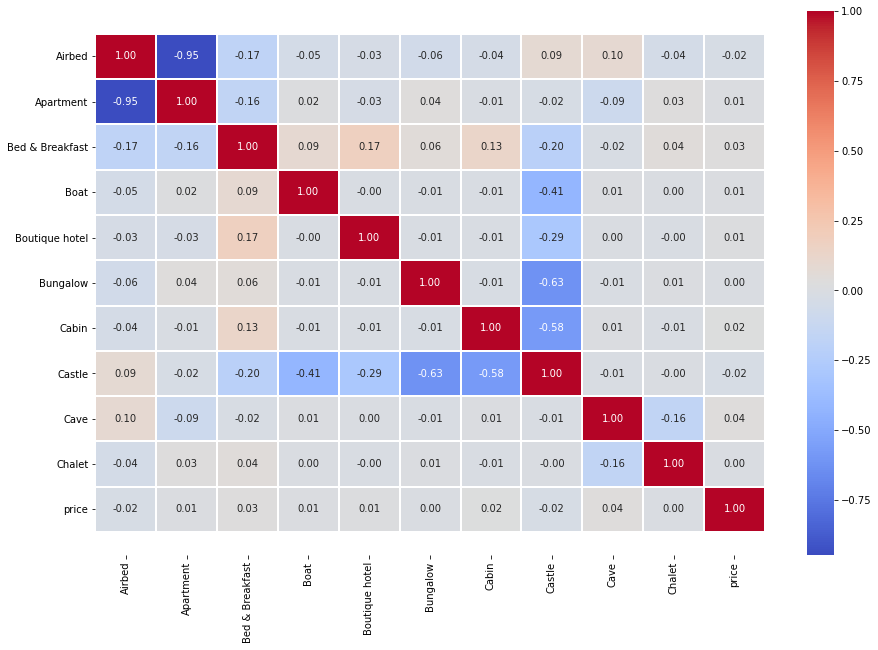

In [ ]:
# we do the correlation matrix as something more visually appealing
# seems to shows more negative correlation than positive one
# correlations with price are very little however

corr_matrix = cols10.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=1,
                fmt=".2f",cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

## Normalizing the preprocessed data

In [ ]:
# we normalize the data before using it. Using StandardScaler means the data will have
# a mean of 0 with a standard deviation of 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_values = listings_NYC.select_dtypes(include=numerics)
num_values_2 = num_values.copy(deep=True)

In [ ]:
num_values = num_values.drop(['id','latitude','longitude','zipcode','price'],axis=1)

In [ ]:
num_values

,accommodates,bathrooms,bedrooms,beds,Normalized rating,realestate,num_venues,venues_rating
0,2.0,1.0,1.0,1.0,10.000000,1946.0,51,4.345098
3,3.0,1.0,1.0,1.0,9.883333,1946.0,54,4.325926
4,4.0,1.0,1.0,1.0,9.950000,1946.0,54,4.325926
5,2.0,1.0,0.0,1.0,9.950000,1946.0,60,4.296667
6,4.0,1.0,1.0,2.0,9.966667,1946.0,51,4.345098
...,...,...,...,...,...,...,...,...
40725,1.0,1.0,1.0,1.0,9.666667,2702.0,879,4.186007
40726,2.0,1.0,1.0,1.0,9.000000,2702.0,1225,4.246857
40727,5.0,1.0,3.0,3.0,9.633333,2702.0,816,4.131618
40730,5.0,1.0,1.0,2.0,9.600000,2702.0,1157,4.229818


In [ ]:
scaler.fit(num_values)
scaler.mean_

array([2.87060333e+00, 1.11685257e+00, 1.14447097e+00, 1.55981611e+00,
       9.45259138e+00, 3.17081180e+03, 1.22454389e+03, 4.11119578e+00])

In [ ]:
num_scaled = scaler.fit_transform(num_values)
print(num_scaled.shape)

(28061, 8)


In [ ]:
num_scaled

array([[-0.48871648, -0.32436157, -0.21264662, ..., -1.63048868,
        -1.17356607,  2.19316508],
       [ 0.07263731, -0.32436157, -0.21264662, ..., -1.63048868,
        -1.17056602,  2.01339935],
       [ 0.6339911 , -0.32436157, -0.21264662, ..., -1.63048868,
        -1.17056602,  2.01339935],
       ...,
       [ 1.19534489, -0.32436157,  2.73115049, ..., -0.62408963,
        -0.40855161,  0.19148396],
       [ 1.19534489, -0.32436157, -0.21264662, ..., -0.62408963,
        -0.06754516,  1.11225604],
       [-1.05007026,  1.06354784,  4.20304904, ..., -0.62408963,
        -0.3445504 ,  0.36704107]])

In [ ]:
cols = list(num_values.columns)

In [ ]:
num_scaled = pd.DataFrame(num_scaled, columns=cols)

In [ ]:
num_scaled

,accommodates,bathrooms,bedrooms,beds,Normalized rating,realestate,num_venues,venues_rating
0,-0.488716,-0.324362,-0.212647,-0.537912,0.848284,-1.630489,-1.173566,2.193165
1,0.072637,-0.324362,-0.212647,-0.537912,0.667493,-1.630489,-1.170566,2.013399
2,0.633991,-0.324362,-0.212647,-0.537912,0.770802,-1.630489,-1.170566,2.013399
3,-0.488716,-0.324362,-1.684545,-0.537912,0.770802,-1.630489,-1.164566,1.739052
4,0.633991,-0.324362,-0.212647,0.422961,0.796629,-1.630489,-1.173566,2.193165
...,...,...,...,...,...,...,...,...
28056,-1.050070,-0.324362,-0.212647,-0.537912,0.331739,-0.624090,-0.345550,0.701460
28057,-0.488716,-0.324362,-0.212647,-0.537912,-0.701352,-0.624090,0.000456,1.272017
28058,1.195345,-0.324362,2.731150,1.383833,0.280084,-0.624090,-0.408552,0.191484
28059,1.195345,-0.324362,-0.212647,0.422961,0.228430,-0.624090,-0.067545,1.112256


In [ ]:
num_values_2=num_values_2.reset_index(drop=True)


In [ ]:
num_values_2

,accommodates,bathrooms,bedrooms,beds,id,latitude,longitude,price,zipcode,Normalized rating,realestate,num_venues,venues_rating
0,2.0,1.0,1.0,1.0,7949480,40.852054,-73.788680,99.0,10464.0,10.000000,1946.0,51,4.345098
1,3.0,1.0,1.0,1.0,6627449,40.849775,-73.786609,125.0,10464.0,9.883333,1946.0,54,4.325926
2,4.0,1.0,1.0,1.0,5557381,40.850024,-73.789328,69.0,10464.0,9.950000,1946.0,54,4.325926
3,2.0,1.0,0.0,1.0,9147025,40.844870,-73.789541,125.0,10464.0,9.950000,1946.0,60,4.296667
4,4.0,1.0,1.0,2.0,11675715,40.851391,-73.784139,85.0,10464.0,9.966667,1946.0,51,4.345098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28056,1.0,1.0,1.0,1.0,17957521,40.708237,-73.943789,59.0,11206.0,9.666667,2702.0,879,4.186007
28057,2.0,1.0,1.0,1.0,14942680,40.708192,-73.949981,90.0,11206.0,9.000000,2702.0,1225,4.246857
28058,5.0,1.0,3.0,3.0,7471933,40.704137,-73.934081,250.0,11206.0,9.633333,2702.0,816,4.131618
28059,5.0,1.0,1.0,2.0,6684697,40.708768,-73.948891,125.0,11206.0,9.600000,2702.0,1157,4.229818


## Final dataframe to use

In [ ]:
num_df = num_scaled
num_df['price'] = num_values_2['price'] 

num_scaled

,accommodates,bathrooms,bedrooms,beds,Normalized rating,realestate,num_venues,venues_rating,price
0,-0.488716,-0.324362,-0.212647,-0.537912,0.848284,-1.630489,-1.173566,2.193165,99.0
1,0.072637,-0.324362,-0.212647,-0.537912,0.667493,-1.630489,-1.170566,2.013399,125.0
2,0.633991,-0.324362,-0.212647,-0.537912,0.770802,-1.630489,-1.170566,2.013399,69.0
3,-0.488716,-0.324362,-1.684545,-0.537912,0.770802,-1.630489,-1.164566,1.739052,125.0
4,0.633991,-0.324362,-0.212647,0.422961,0.796629,-1.630489,-1.173566,2.193165,85.0
...,...,...,...,...,...,...,...,...,...
28056,-1.050070,-0.324362,-0.212647,-0.537912,0.331739,-0.624090,-0.345550,0.701460,59.0
28057,-0.488716,-0.324362,-0.212647,-0.537912,-0.701352,-0.624090,0.000456,1.272017,90.0
28058,1.195345,-0.324362,2.731150,1.383833,0.280084,-0.624090,-0.408552,0.191484,250.0
28059,1.195345,-0.324362,-0.212647,0.422961,0.228430,-0.624090,-0.067545,1.112256,125.0


In [ ]:
df = num_df.join(cat_df)

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(['price'],axis=1)
 
train, other = train_test_split(df, test_size = 0.2, random_state = 42)
validation, test = train_test_split(other, test_size = 0.5, random_state=42)

In [ ]:
X_train = train.drop(columns=['price'])
y_train = train['price']
X_validation = validation.drop(columns=['price'])
y_validation = validation['price']
X_test = test.drop(columns=['price'])
y_test = test['price']

## Training regression model

In [ ]:
# creating a basic decision tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# we use sklearn's K-fold cross validation feature to split the training set in 10 distinct subsets
# on which the Decision Tree model can work on

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,X_train,y_train,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
#let us check initial results

def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard Deviation:', scores.std())

display_scores(tree_rmse_scores)

Scores: [72.13731338 73.16735249 77.6577409  71.7324744  73.5263933  75.73434111
 74.59848873 69.79426655 71.19487892 72.15554969]
Mean: 73.1698799481609
Standard Deviation: 2.1986809072434568


In [ ]:
# lets see how linear regression works here
# seems like linear regression performs better (•needs verification as it doesn't work anymore•)

from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

lin_scores = cross_val_score(l_reg, X_train, y_train,
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.69201015e+01 5.71257369e+01 8.26007188e+10 5.70068746e+01
 5.66520098e+01 6.00610861e+01 5.44510747e+01 1.56328645e+10
 5.75822011e+01 5.35189857e+01]
Mean: 9823358381.82407
Standard Deviation: 24702796411.45845


In [ ]:
# # bad overfitting of the DecisionTree, we decide to use a RandomForestRegressor
# # seems to work much better so we continue with this model 

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                             scoring='neg_mean_squared_error', cv=10)
model = forest_reg.fit(X_train,y_train)
forest_rmse = np.sqrt(-forest_scores)
display_scores(forest_rmse)

Scores: [52.45511061 52.08132582 53.77398207 52.26699348 52.18841584 55.66384459
 52.41310875 51.03975485 51.53264413 49.85568045]
Mean: 52.32708605852341
Standard Deviation: 1.4741336346569553


## Random Forest Regressor Training

In [ ]:
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
model = RandomForestRegressor(random_state=42)
model = model.fit(X_train,y_train)

ypred = model.predict(X_validation)

NameError: ignored

In [ ]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
two_features_mse = mean_squared_error(y_validation, ypred)
two_features_rmse = two_features_mse ** (1/2)

med_error = median_absolute_error(y_validation, ypred)

print(two_features_rmse)
print(two_features_mse)
print(med_error)

NameError: ignored

##Hyperparameter Tuning

In [ ]:
# RandomizedSearchCV creates all the possible combinations of the parameters for 
# the random forest given and tries each one to identify the most accurate

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
model_random = model_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 126.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 235.9min finished


In [ ]:
model_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1600}

In [ ]:
model = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=20, max_features='sqrt',min_samples_leaf=1,min_samples_split=10, n_estimators=1600)
model = model.fit(X_train,y_train)

ypred = model.predict(X_validation)

In [ ]:
print(two_features_rmse)
print(two_features_mse)
print(med_error)

51.50469352127753
2652.7334547207274
20.66949190573878


## Recursive Feature Elimination with Cross-Validation

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
selector = RFECV(model, step=1, cv=3, verbose=2)
selector = selector.fit(X_train,y_train)

In [ ]:
sel = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=1600, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
sel = sel.fit(X_train,y_train)

ypred = sel.predict(X_validation)

NameError: ignored

## Converting exact price to price range

In [ ]:
params = list(zip(X_train, model.feature_importances_))
params.sort(key=lambda tup: tup[1])
params

[('House', 0.0),
 ('Guest suite', 3.565344222123803e-07),
 ('Private room', 2.0610874402558313e-06),
 ('Pull-out Sofa', 3.5625206838390005e-06),
 ('moderate', 4.173744713264935e-06),
 ('Shared room', 4.277619247314772e-06),
 ('Futon', 5.010423179494555e-06),
 ('Condominium', 5.555139153615694e-06),
 ('Other', 7.233642451919802e-06),
 ('Earth House', 1.4715460882737657e-05),
 ('Hostel', 1.590913286438329e-05),
 ('Lighthouse', 4.042472556487929e-05),
 ('Entire home/apt', 4.7620553681300584e-05),
 ('Hut', 5.789923557328348e-05),
 ('Villa', 7.497867681491095e-05),
 ('Dorm', 7.694232822909707e-05),
 ('In-law', 0.00013502377807553682),
 ('Vacation home', 0.00020064182964615735),
 ('strict', 0.00020671551379268906),
 ('Boutique hotel', 0.00028856780285555395),
 ('Cabin', 0.00044800836440900716),
 ('Chalet', 0.00045760017866904685),
 ('Boat', 0.0004997577376078925),
 ('Bungalow', 0.0006122934426487662),
 ('Timeshare', 0.000935376747437506),
 ('Serviced apartment', 0.0011093249481270396),
 ('Co

In [ ]:
predict_copy = ypred.copy()

In [ ]:
test = np.ndarray(shape=(len(predict_copy),2), dtype=float, buffer = np.zeros(2*len(predict_copy)))

In [ ]:
for i in range(len(predict_copy)):
    test[i]= [predict_copy[i]-25,predict_copy[i]+25]
test

array([[ 79.65566425, 129.65566425],
       [175.70474983, 225.70474983],
       [212.24339929, 262.24339929],
       ...,
       [104.63287961, 154.63287961],
       [ 34.052506  ,  84.052506  ],
       [ 37.97945294,  87.97945294]])

In [ ]:
correct = 0 

In [ ]:
list_correct = list(y_validation)

In [ ]:
for i in range(len(predict_copy)):
  if test[i][0]<=list_correct[i]<=test[i][1]:
    correct += 1

In [ ]:
correct/len(predict_copy)

0.570639586673793

In [ ]:
for i in range(10):
  print(list_correct[i])
  print(ypred[i])
  print('/n')

77.0
104.65566425062745
/n
250.0
200.70474982856885
/n
260.0
237.24339929244877
/n
75.0
124.53811555459257
/n
120.0
134.32165024250952
/n
55.0
52.14618637035753
/n
180.0
179.95389225977345
/n
235.0
279.92584403088216
/n
100.0
64.92113219259596
/n
300.0
244.52281793368172
/n


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management